# TF-IDF and K-Means Clustering
### Applied to the titles of 12,000 Etsy listings

Notes from April 17:  

Graph of inertia indicates that the optimal number of clusters may be a lot higher than I initially thought.  10 works ok, but it is possible that 17 or higher might be better?

Consider removing "wheel" "thrown" and "wheelthrown" to the stopwords and re-running the clustering. at n=17, all but one cluster seem to have clear labels.  THe one that isn't clear is the cluster thats been created related to the words "wheel" and thrown"

In [1]:
# import libraries
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# import libraries for algorithm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
# import the dataset
df = pd.read_csv('data/titles-cleaned033122.csv')

In [4]:
df

,Unnamed: 0,title_x
0,0,"['vessel', 'sinks', 'mashima', 'stamped', 'des..."
1,1,"['vessel', 'sinks', 'mishima', 'stamped', 'des..."
2,2,"['custom', 'small', 'white', 'oval', 'vessel',..."
3,3,"['custom', 'blue', 'vessel', 'sink', 'designed..."
4,4,"['carved', 'cup', 'wheel', 'thrown', 'mug', 'c..."
...,...,...
11995,11995,"['rustic', 'bowl', 'second', 'choice', 'product']"
11996,11996,"['vintage', 'ashtray', 'bulgarian', 'painted',..."
11997,11997,"['french', 'pitcher', 'beautiful', 'studio', '..."
11998,11998,"['cat', 'cup', 'mug', 'white', 'glaze', 'light']"


In [5]:
# remove the punctuation
df['title_string'] = df['title_x'].apply(lambda x: re.sub("[^A-Za-z]+", " ", x))

In [6]:
# change the dataframe column to a series to use with the model
title = df['title_string']

TD-IDF Vectorization

In [7]:
# initialize the vectorizer
vector = TfidfVectorizer(sublinear_tf=True, min_df=15)

In [8]:
# Apply vectorizer and save array of vectors in V
V = vector.fit_transform(title)

In [9]:
V.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Apply K-means algorithm

### Find optimal number of clusters
Source: https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f

In [89]:
Sum_of_squared_distances = []
K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(V)
    Sum_of_squared_distances.append(km.inertia_)

### NOTE: Where is the elbow?

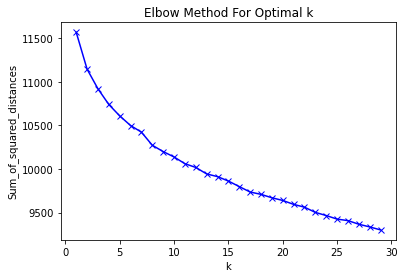

In [91]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [92]:
# intialize k-means
kmeans = KMeans(n_clusters=17, random_state=42)

In [81]:
# fit the model to the vectors
kmeans.fit(V)

KMeans(n_clusters=17, random_state=42)

In [82]:
# store cluster labels in a variable
clusters = kmeans.labels_

#look at the cluster labels
[c for c in clusters][:20]

[12, 12, 12, 12, 5, 5, 0, 0, 16, 0, 16, 0, 0, 16, 16, 0, 0, 0, 0, 16]

Dimension Reduction and Visualization

In [83]:
# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)

# pass the vectors to the pca and store the vectors
vectorsPCA = pca.fit_transform(V.toarray())

In [84]:
# save the two dimensions
xD = vectorsPCA[:, 0]
yD = vectorsPCA[:, 1]

In [85]:
# add vectors and clusters to the dataframe
df['cluster'] = clusters
df['xD'] = xD
df['yD'] = yD

Visualize

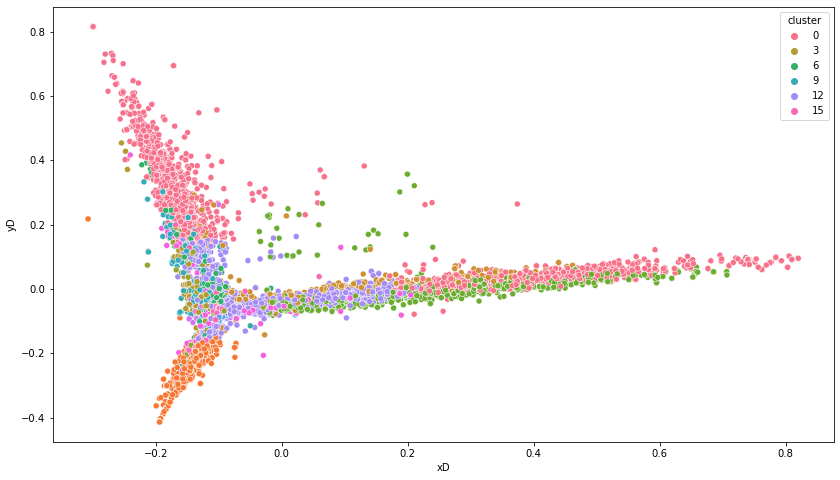

In [86]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x="xD", y="yD", hue='cluster', palette="husl")
plt.show()

In [78]:
def top_words(n):
    words_df = pd.DataFrame(V.todense()).groupby(clusters).mean()
    words = vector.get_feature_names()
    for i,r in words_df.iterrows():
        print('\nCluster {}'.format(i))
        print(', '.join([words[w] for w in np.argsort(r)[::-1][:n]]))

In [87]:
top_words(10)


Cluster 0
mug, coffee, tea, gift, large, blue, cup, unique, green, white

Cluster 1
vase, flower, bud, blue, small, white, glaze, vintage, decor, studio

Cluster 2
thrown, wheel, mug, kind, coffee, blue, cup, tea, holder, carved

Cluster 3
plate, set, serving, dinner, tableware, dinnerware, gift, plates, holiday, christmas

Cluster 4
jar, lidded, lid, storage, honey, canister, pot, thrown, sugar, garlic

Cluster 5
cup, coffee, mug, tea, espresso, tumbler, blue, gift, white, large

Cluster 6
bowls, set, dinnerware, bowl, plates, soup, dinner, nesting, dishes, blue

Cluster 7
crock, butter, miniature, utensil, french, antique, keeper, cobalt, replica, lug

Cluster 8
beads, angela, jewelry, supplies, bracelet, making, macrame, chunky, rustic, bracelets

Cluster 9
dish, soap, ring, trinket, bowl, holder, jewelry, small, casserole, baking

Cluster 10
earrings, charms, pendant, floral, flower, bird, cat, gold, aesthetic, contemporary

Cluster 11
pendant, necklace, connector, flowers, jewelr